# Cell Types Plotting

This notebook will build on our previous Cell Types notebook to help us (*finally!*) plot the data that we've pulled from the Allen Cell Types database.

### By the end of this notebook, you'll be able to:
* Create plots using matplotlib.pyplot
* Manipulate aspects of plots
* Create bar, box, and scatter plots from the Allen ephys metrics
* Plot raw recording traces from the Allen ephys data

### Table of Contents
1. [Step One: Plotting tools](#one)
2. [Step Two: Get data](#two)
3. [Step Three: Plot our ephys metrics](#three)
4. [Step Four: Organize the raw traces](#four)
5. [Step Five: Plot the raw traces](#five)

<a id="one"></a>

## Step One: Get comfortable with our plotting tools

First, let's get set up for plotting by importing the necessary tool boxes.

In [1]:
# Tell Jupyter to plot our plots inline, shows plots in the notebook 
%matplotlib inline

# Import matplotlib and "pyplot" module
# plt is the common abbreviation for matplotlib's pyplot module
import matplotlib as mpl
import matplotlib.pyplot as plt

First, let's create a <a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html">random line</a> using our favorite scientific computing toolbox, and show how we can use the `matplotlib.pyplot` module to plot it.

Useful functions:
* `plt.plot()` create a plot from a list, array, pandas series, etc.
* `plt.show()` show the plot (not strictly necessary in Jupyter, necessary in other IDEs)
* `plt.xlabel()` and `plt.ylabel()` change x and y labels
* `plt.title()` add a title

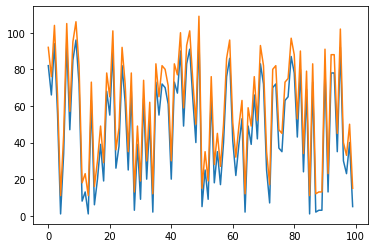

In [2]:
import numpy as np

# Generate a random line from 1 to 100 with 100 values
random_line = np.random.randint(1,100,100) #(start value, end value, number of points) 
random_line

plt.plot(random_line)
plt.plot(random_line+10) #adding another line of code creates two lines in the same plot 
plt.show()

The `plt.hist()` function works really similarly (see documentation <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html">here</a>).

<div class="alert alert-success"><b>Task</b>: In the cell below:
    
1. Generate a random list of 100 data points from a standard normal distribution (Hint: Use <code>np.random.standard_normal()</code>, documentation <a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.standard_normal.html#numpy.random.standard_normal">here</a>).
    
2. Plot a histogram of our the data. 
</div>

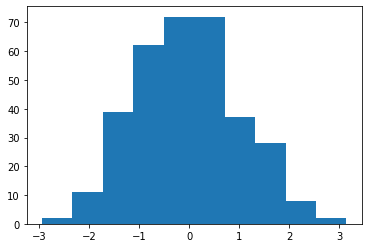

In [3]:
dist = np.random.standard_normal (333)
plt.hist(dist)
plt.show()

We can also set up multiple subplots on the same figure using `subplots`. This also creates separate **axes** (really, separate plots) which we can access and manipulate, particularly if you are plotting multiple lines. It's common to use the `subplots` command for easier access to axis attributes.

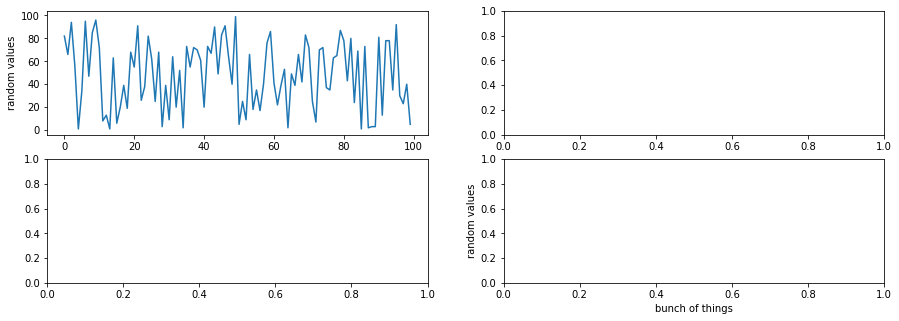

In [4]:
#for multiple plots better to use subplots cuz you can change more things in each plot

fig, ax = plt.subplots(2,2,figsize=(15,5))  #(size, size, figsize(slightly bigger than random)), 2x2 plot
ax[0,0].plot(random_line)
ax[0,0].set_ylabel('random values') #labels the specified plot, [0,0] specifies the first plot 

plt.xlabel('bunch of things')

plt.ylabel('random values') #updates on the last plot made
plt.show()

There are *many, many* different aspects of a figure that you could manipulate (and spend a lot of time manipulating). 

Style guides help with this a bit, they set a few good defaults. Below, we are setting figure parameters, and choosing a figure style (see all styles <a href="https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html">here</a>, or how to create your own style <a href="https://matplotlib.org/tutorials/introductory/customizing.html">here</a>.)

You can test how these parameters change our plots by going back and re-plotting the plots above.

In [5]:
#can choose a style guide from the links to follow 

# Set the figure "dots per inch" to be higher than the default (optional, based on your personal preference)
mpl.rcParams['figure.dpi'] = 100

# (Optional) Choose a figure style
print(plt.style.available)  #shows all the available style options
plt.style.use('tableau-colorblind10')  #one of the style options that are good for color blind ppl 

['Solarize_Light2', '_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'tableau-colorblind10']


<a id="two"></a>

## Step Two: Get metadata & electrophysiology data

Here, we'll condense the steps from the previous notebook into one cell.

<b>Note</b>: In order to run the line below, you need to have the AllenSDK installed. You can find information on how to do that <a href="http://alleninstitute.github.io/AllenSDK/install.html">here</a>. If you're running this on the UCSD Datahub, the Allen SDK has already been installed for you.

In [6]:
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi

import pandas as pd

# We'll then initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

human_df = pd.DataFrame(ctc.get_cells(species=[CellTypesApi.HUMAN])).set_index('id') #makes a dataframe; defines species and index 
ephys_features = pd.DataFrame(ctc.get_ephys_features()).set_index('specimen_id') #second dataframe for the features of the cells
human_ephys_df = human_df.join(ephys_features) #combines the dataframes, so all humans cells with its cell features 
human_ephys_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
id,,,,,,,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,...,4.134987,1.375253,-53.968754,-59.510420,-71.197919,2.895461,2.559876,3.099787,-88.843758,-70.561035
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,...,NaN,1.051160,-67.468758,NaN,-70.875002,1.891881,NaN,1.989616,-101.000000,-69.209610
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,...,5.694547,1.389900,-52.125004,-51.520836,-72.900002,3.121182,3.464528,3.054681,-87.531250,-72.628105
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,...,9.962780,1.211020,-53.875004,-52.416668,-73.693753,4.574865,3.817988,4.980603,-84.218758,-72.547661
596020931,None,"[66.0, 220.0, 105.0]",Homo Sapiens,H17.06.009.11.04.02,4,12141,MTG,,aspiny,NA,...,14.667340,1.336668,-63.593754,-63.239583,-75.518753,1.452890,1.441754,1.556087,-82.531250,-74.260269


<a id="three"></a>

## Step Three: Plot our ephys metrics

Our plotting goal for today is to compare spiny and aspiny cells in humans. We have two options: we could split the dataframe into aspiny and spiny (as you did in 08-CellTypes), or use our plotting tools to plot the data separately.

Usefully, Pandas has some <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html">built-in plotting tools</a> to interact with Matplotlib, so we can actually just tell it to plot based on spiny and aspiny.

First, let's plot the **number of cells** that we have for each of the dendrite types. Recall that we can access a column by using the bracket notation, with the column name in parentheses in the bracket.

`value_counts()` is a method that will count up the number of instances of each value.
`plot()` is a method that will plot, depending on the `kind` argument you give it.

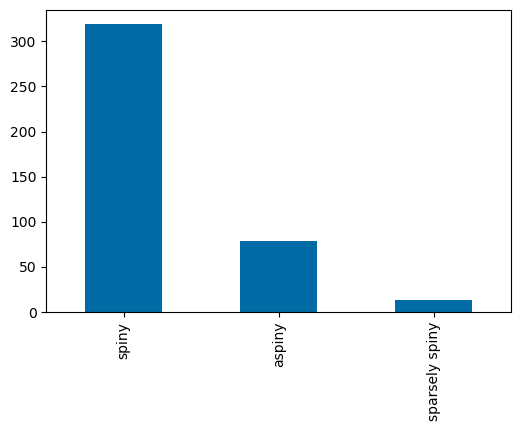

In [7]:
human_ephys_df['dendrite_type'] #gives the column of the dendrite types 
human_ephys_df['dendrite_type'].value_counts() #gives totals for each dendrite type 
human_ephys_df['dendrite_type'].value_counts().plot(kind='bar') #actually plots the totals of the dendrite types 


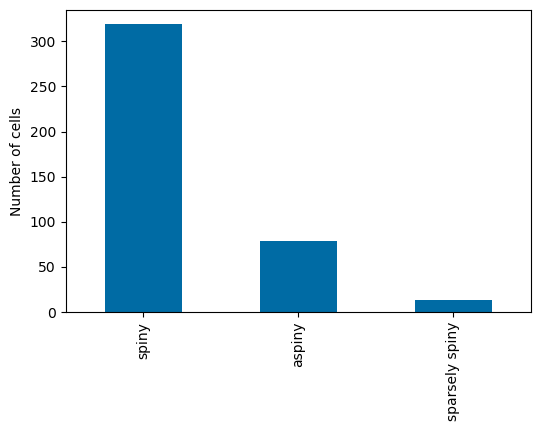

In [8]:
# For the different values in dendrite_type column, get the value_counts, and plot as a bar plot.
#plots the dendrite types of each cell in a bar plot 
human_ephys_df['dendrite_type'].value_counts().plot(kind='bar')

# Add y label
plt.ylabel('Number of cells')

# Show the plot!
plt.show()

Our dataframe contains a *lot* of different metrics on these cells. Let's remind ourselves what we have available by accessing the `columns` attribute.

In [9]:
human_ephys_df.columns  #shows the diff column titles in the dataset 

Index(['reporter_status', 'cell_soma_location', 'species', 'name',
       'structure_layer_name', 'structure_area_id', 'structure_area_abbrev',
       'transgenic_line', 'dendrite_type', 'apical', 'reconstruction_type',
       'disease_state', 'donor_id', 'structure_hemisphere', 'normalized_depth',
       'adaptation', 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope',
       'fast_trough_t_long_square', 'fast_trough_t_ramp',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_ramp', 'fast_trough_v_short_square', 'has_burst',
       'has_delay', 'has_pause', 'id', 'input_resistance_mohm', 'latency',
       'peak_t_long_square', 'peak_t_ramp', 'peak_t_short_square',
       'peak_v_long_square', 'peak_v_ramp', 'peak_v_short_square',
       'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 'seal_gohm',
       'slow_trough_t_long_square', 'slow_trough_t_ramp',
       'slow_trough_t_short_square', 'slow_trough_v_long_square',
       'slow_trough_v_r

Let's choose one of these columns and plot a boxplot. We'll do this with a call to pyplot ([examples here](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py)).

**Note**: This is actually *slightly* easier by using the methods of our dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html), but it's a little bit more difficult to work with separate objects of the plot afterwards. Knowing how to create plots with a call to `plt.boxplots()` is a more universal way to work with various types of data structures, including dataframes, arrays, lists, etc.

<div class="alert alert-success"><b>Task</b>: Create a boxplot that compares spiny, aspiny, and sparsely spiny with the following steps:
    
1. Create a figure and axes by using <code>plt.subplots()</code>.
2. Save three different dataframes from your <code>human_ephys_df</code> by filtering for spiny, aspiny, and sparsely spiny.
3. Assign the 'fast_trough_v_long_square' of each of your spiny, aspiny, and sparsely spiny dataframes to three different pandas series objects (like a dataframe, but only one dimension). For example,
    <code>spiny_ft = spiny_data['fast_trough_v_long_square']</code>
4. Create a list of your three different pandas series, and assign it to <code>data</code>.
5. Create a boxplot by using <code>ax.boxplot()</code> and don't forget to show it!
6. Once you're sure the boxplot is working, add a few lines of code to change the xticks, as well as add x and y labels (<a href="https://matplotlib.org/api/axes_api.html#axis-limits">see documentation here</a>).</div>

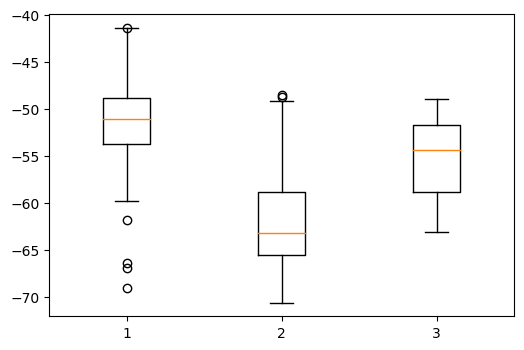

In [10]:
plt.subplots()

spiny_df = human_ephys_df[human_ephys_df['dendrite_type'] == 'spiny']
aspiny_df = human_ephys_df[human_ephys_df['dendrite_type'] == 'aspiny']
sspiny_df = human_ephys_df[human_ephys_df['dendrite_type'] == 'sparsely spiny']

#spiny_df = human_ephys_df[human_ephys_df['dendrite_type'].str.match('spiny')]
#aspiny_df = human_ephys_df[human_ephys_df['dendrite_type'].str.match('aspiny')]
#sspiny_df = human_ephys_df[human_ephys_df['dendrite_type'].str.match('sparsely spiny')]

spiny_ft = spiny_df['fast_trough_v_long_square']
aspiny_ft = aspiny_df['fast_trough_v_long_square']
sspiny_ft = sspiny_df['fast_trough_v_long_square']

data = [spiny_ft, aspiny_ft, sspiny_ft]

plt.boxplot(data)
plt.show()


Pandas built in scatterplot methods are bit clunky, so we'll use `plt.scatter()` instead ([documentation here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter).

The syntax for a scatter plot is slightly longer if we want to label multiple groups with different colors. We'll actually loop through groups in order to create our plot:

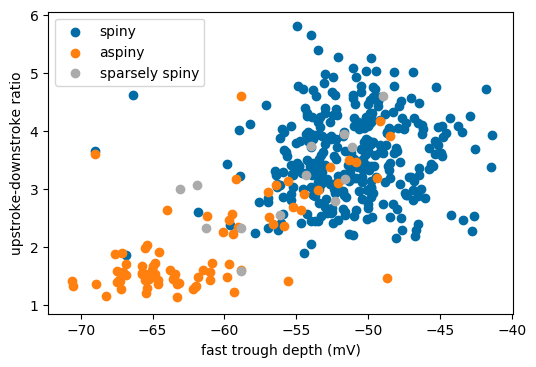

In [11]:
# Get possible dendrite types
dendrite_types = human_ephys_df['dendrite_type'].unique()

fig = plt.figure()
#fig, ax = plt.subplots()   can use this line of code too 

for d_type in dendrite_types:
    
    df = human_ephys_df[human_ephys_df['dendrite_type'] == d_type]  
    
    plt.scatter(df['fast_trough_v_long_square'], #x-axis
                df['upstroke_downstroke_ratio_long_square'],  #y-axis
                label=d_type)  #labels with spiny, aspiny, sspiny
    
plt.ylabel("upstroke-downstroke ratio")
plt.xlabel("fast trough depth (mV)")
plt.legend(loc='best') 
    
plt.show()

<a id="four"></a>

## Step Four: Organize the raw recording traces

The Allen database also shares the raw data in addition to the computed metrics that we plotted above. Let's take a look at a few recording traces from cells with different upstroke and downstroke ratios, to help us get an understanding of what that metric is actually capturing.

<div class="alert alert-success"><b>Task</b>: Use the <code>sort_values()</code> method on <code>human_ephys_df</code> dataframe to sort it by 'upstroke_downstroke_ratio_long_square'. We also need to tell this method to set <code>ascending</code> to False, because the default value is True <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html">see documentation here</a>).

Assign your new dataframe to `df_upstroke_sorted`. Show the first five rows and make sure that it's sorted with the highest 'upstroke_downstroke_ratio_long_square' value at the top.</div>

In [12]:
df_upstroke_sort = human_ephys_df.sort_values('upstroke_downstroke_ratio_long_square', ascending = False)
df_upstroke_sort.head()

#sort values is based on this column, and sorts high to low 


,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
id,,,,,,,,,,,,,,,,,,,,,
508413678,None,"[325.0, 258.0, 104.0]",Homo Sapiens,H16.06.004.02.12.02,5,12141,MTG,,spiny,truncated,...,6.510367,1.662893,-55.031250,-58.197919,-74.083336,5.808203,4.815587,4.989541,-97.000000,-74.642593
614635228,None,"[78.0, 272.0, 91.0]",Homo Sapiens,H17.06.003.11.03.02,6,12141,MTG,,spiny,intact,...,2.665300,1.792348,-55.218754,-57.843753,-64.600005,5.647832,5.157456,4.756807,-90.437500,-64.658691
613944404,None,"[66.0, 220.0, 105.0]",Homo Sapiens,H17.06.009.11.03.02,6,12141,MTG,,spiny,truncated,...,6.685520,1.128613,-57.687504,-58.250003,-67.364583,5.395297,5.514112,5.281676,-74.343758,-65.955498
508280093,None,"[325.0, 258.0, 104.0]",Homo Sapiens,H16.06.004.02.03.02,3,12141,MTG,,spiny,truncated,...,9.595373,1.148096,-58.687504,-56.781253,-73.800006,5.271071,5.358797,4.961195,-82.093750,-72.618416
539661667,None,"[317.0, 268.0, 88.0]",Homo Sapiens,H16.06.011.01.01.05.05,4,12141,MTG,,spiny,truncated,...,11.566167,1.240565,-50.500000,-53.750004,-71.765627,5.254420,4.856478,4.635297,-82.531250,-71.526840


Now, let's get the id and 'upstroke_downstroke_ratio_long_square' value for the first cell in our dataset. Remember that we set it up so that the index of our dataframe contains the ID numbers.

<div class="alert alert-success"><b>Task:</b> Above the <code>print()</code> statements below, do the following:
    
1. Assign the entire first row of the dataframe to `top_cell`.
2. Assign the index (id number) of the top cell to `cell_id`.
    
</div>

In [13]:
top_cell = df_upstroke_sort.iloc [0]  #prints the first row
cell_id = df_upstroke_sort.index [0]  #prints the cell id, prints the information in index 0

print('Cell with biggest upstroke:downstroke ratio')
print('Specimen ID: ' + str(cell_id))
print('With upstroke-downstroke ratio: ' + str(top_cell['upstroke_downstroke_ratio_long_square']))

Cell with biggest upstroke:downstroke ratio
Specimen ID: 508413678
With upstroke-downstroke ratio: 5.80820278593181


Now, we can use yet another method of our CellTypesCache instance (`ctc`) to get the raw electrophysiology data for this cell.

<div class="alert alert-success"><b>Task</b>: Use the <code>get_ephys_data()</code> method to get the raw data for our top cell. You'll need to give this method the `cell_id`. <a href="http://alleninstitute.github.io/AllenSDK/allensdk.core.cell_types_cache.html">Full documentation here</a> and <a href="https://alleninstitute.github.io/AllenSDK/cell_types.html">examples here</a>.</div>

In [16]:
upstroke_data = ctc.get_ephys_data(cell_id)
upstroke_data #creates an object with many diff methods you can use for the database 


This data will return us a NwbDataSet object. This stands for 'Neurodata Without Borders' and is an increasingly common file type that folks use to share data [(More information here)](https://www.nwb.org/). NWBdata files contain their own methods and data, including one called `get_sweep_numbers()` which will print a list of ID numbers for the "sweeps," or different recordings that were done with different levels of current. It also has a method `get_sweep_metadata` to extract the information about what stimulus was given on each sweep.

In the code block below, we'll extract the sweep numbers for when the stimulus amplitude was greater than 100.

In [17]:
#gives the ID numbers when the upstroke was greater than 100 by using the method .get_sweep_numbers 
sweepIDs = upstroke_data.get_sweep_numbers()     #don't worry too much about this coding 

sweepNum = len(sweepIDs)
for i in range(1,sweepNum):
    sweepMeta = upstroke_data.get_sweep_metadata(sweepIDs[i])
    if sweepMeta['aibs_stimulus_name'] == 'Long Square':
        if sweepMeta['aibs_stimulus_amplitude_pa'] > 100:
            print(sweepIDs[i])

39
40
41
43
44
45
47
48
49
50
53


/opt/conda/lib/python3.6/site-packages/allensdk/core/nwb_data_set.py:386: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  sweep_metadata[field] = stim_details[field].value


We still need to clean up a few things before plotting. First, we'll use the `get_sweep()` method to get the actual raw data for one particular sweep. Then, we'll get the corresponding amplitude of the stimulus, voltage of the recording trace, and time of the recording.

In [18]:
# choose a sweep number to plot
#choosing the 48 ID to get the raw data for that sweep by using the method .get_sweep
#sweeps are diff amps of currents given to the cell 
upstroke_sweep_id = 48
upstroke_sweep = upstroke_data.get_sweep(upstroke_sweep_id) 

i = upstroke_sweep["stimulus"] # in A
v = upstroke_sweep["response"] # in V
i *= 1e12 # this converts the value to pA
v *= 1e12 # this converts the value to mV

sampling_rate = upstroke_sweep["sampling_rate"] # in Hz
t = (np.arange(0, len(v)) * (1.0 / sampling_rate))

/opt/conda/lib/python3.6/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/opt/conda/lib/python3.6/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/opt/conda/lib/python3.6/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/opt/conda/lib/python3.6/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/opt/conda/lib/python3.6/site-packages/allensdk/core/nwb_data_set.py:135: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  exp_idx_start = 

<a id="five"></a>

## Step Five: Plot the raw recording traces

*Finally*, let's plot our data.

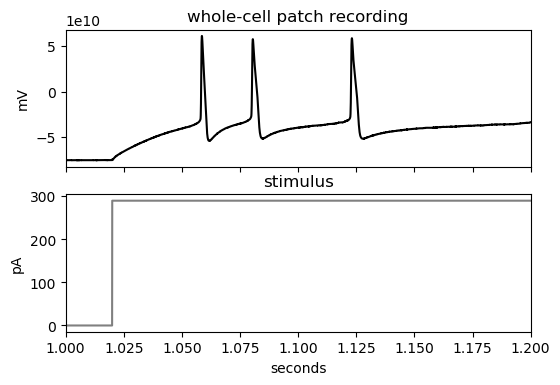

In [21]:
fig, axes = plt.subplots(2, 1, sharex=True)  #subplots with two rows and one column of graphs 

# axes 0 is our first plot, of the recorded voltage data
axes[0].plot(t, v, color='black')
axes[0].set_ylabel("mV")
axes[0].set_title("whole-cell patch recording")

#axes 1 is our second plot, of the stimulus trace
axes[1].plot(t, i, color='gray')
axes[1].set_ylabel("pA")
axes[1].set_xlabel("seconds")
axes[1].set_title("stimulus")

plt.xlim(1,1.2)  #changes the "limit" of the x-axis and shortens it so you can see the shape of the AP better
plt.show()

Hmm, it'd be nice to see the action potentials a little more clearly.

<div class="alert alert-success"><b>Task</b>: Modify the plotting script (hint, use the <code>xlim()</code> method of <code>plt</code>) so that you can actually see the shape of the action potential.</div>

Thankfully, now that we have the code above, we can use this to plot *traces for any stimulus and any cell in the dataset*.

<div class="alert alert-success"><b>Task</b>: Instead of plotting the *top* upstroke_downstroke_ratio cell, plot the bottom cell. Create as many cells as you need below in order to do this.</div>

In [22]:
#same code as before but changes the index to -1 to plot the bottom cell

top_cell = df_upstroke_sort.iloc[-1]  
cell_id = df_upstroke_sort.index[-1]

upstroke_data = ctc.get_ephys_data(cell_id)

sweepIDs = upstroke_data.get_sweep_numbers()

sweepNum = len(sweepIDs)
for i in range(1,sweepNum):
    sweepMeta = upstroke_data.get_sweep_metadata(sweepIDs[i])
    if sweepMeta['aibs_stimulus_name'] == 'Long Square':
        if sweepMeta['aibs_stimulus_amplitude_pa'] > 100:
            print(sweepIDs[i])

2020-02-06 14:32:54,009 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/742807052


31
33
44


In [23]:
upstroke_sweep_id = 44
upstroke_sweep = upstroke_data.get_sweep(upstroke_sweep_id) 

i = upstroke_sweep["stimulus"] # in A
v = upstroke_sweep["response"] # in V
i *= 1e12 # this converts the value to pA
v *= 1e12 # this converts the value to mV

sampling_rate = upstroke_sweep["sampling_rate"] # in Hz
t = (np.arange(0, len(v)) * (1.0 / sampling_rate))

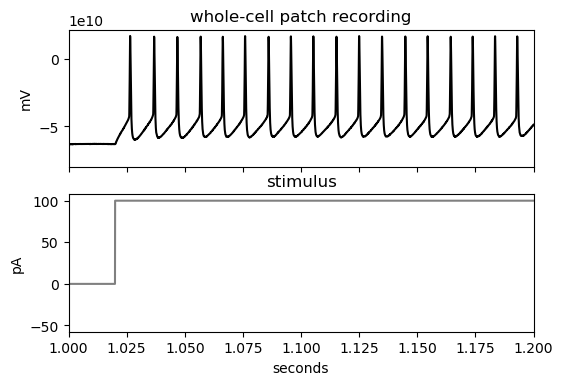

In [24]:
fig, axes = plt.subplots(2, 1, sharex=True)  #subplots with two rows and one column of graphs 

# axes 0 is our first plot, of the recorded voltage data
axes[0].plot(t, v, color='black')
axes[0].set_ylabel("mV")
axes[0].set_title("whole-cell patch recording")

#axes 1 is our second plot, of the stimulus trace
axes[1].plot(t, i, color='gray')
axes[1].set_ylabel("pA")
axes[1].set_xlabel("seconds")
axes[1].set_title("stimulus")

plt.xlim(1,1.2)  #changes the "limit" of the x-axis and shortens it so you can see the shape of the AP better
plt.show()

#this cell spikes a lot more than the one above 